In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('sp500_historical_data.csv')

In [22]:
df

,Date,Open,High,Low,Close,Adj Close,Volume,Ticker
0,2020-01-02,148.561874,150.510040,148.110367,150.501678,120.669174,4307633,MMM
1,2020-01-03,148.010040,149.381271,146.847824,149.205688,119.630074,2950412,MMM
2,2020-01-06,148.118729,149.423080,147.449829,149.347824,119.744034,2389608,MMM
3,2020-01-07,149.063538,149.255859,147.842804,148.745819,119.261368,2598908,MMM
4,2020-01-08,148.829437,151.755859,148.536789,151.028427,121.091507,3298927,MMM
...,...,...,...,...,...,...,...,...
498599,2023-12-22,195.320007,195.910004,192.740005,194.979996,193.985657,1548400,ZTS
498600,2023-12-26,194.880005,196.339996,194.089996,195.500000,194.503006,814600,ZTS
498601,2023-12-27,195.410004,197.009995,194.740005,196.899994,195.895859,766400,ZTS
498602,2023-12-28,197.619995,198.600006,196.529999,197.160004,196.154541,880100,ZTS


# Test scenario for one ticker

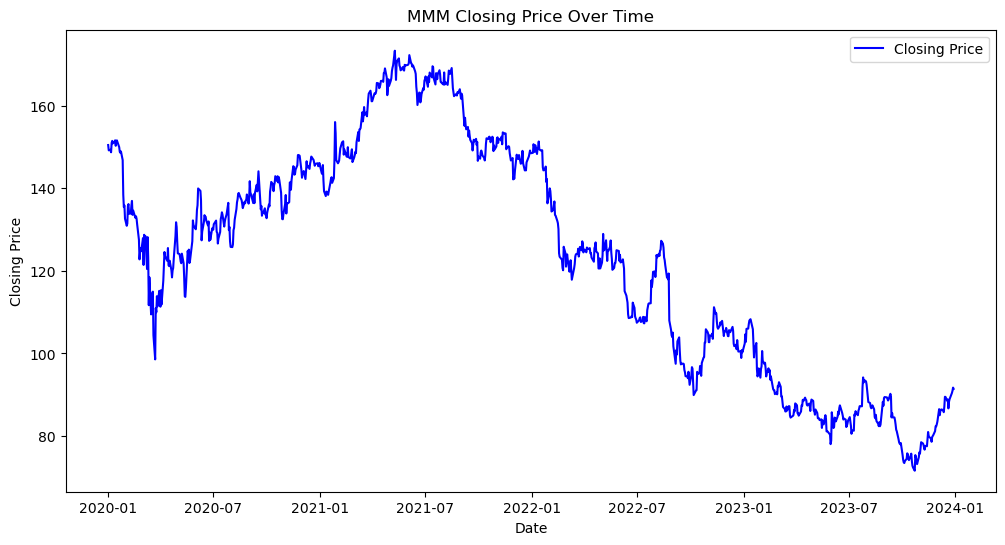

In [7]:
import pandas as pd
import matplotlib.pyplot as plt

df['Date'] = pd.to_datetime(df['Date'])

df_mmm = df[df['Ticker'] == 'MMM']

plt.figure(figsize=(12, 6))
plt.plot(df_mmm['Date'], df_mmm['Close'], label='Closing Price', color='blue')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('MMM Closing Price Over Time')
plt.legend()
plt.show()


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])


/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


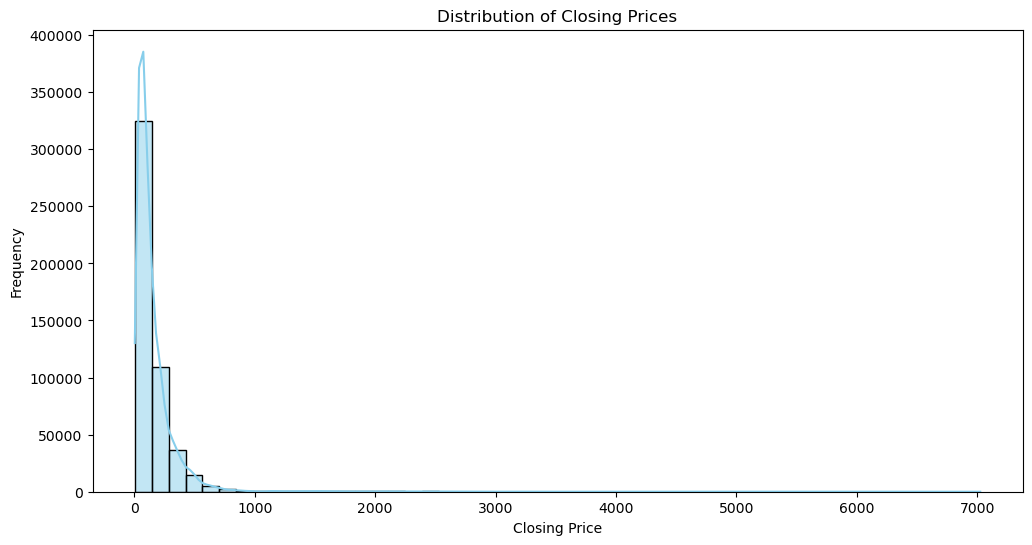

In [10]:
plt.figure(figsize=(12, 6))
sns.histplot(df['Close'], bins=50, kde=True, color='skyblue')
plt.title("Distribution of Closing Prices")
plt.xlabel("Closing Price")
plt.ylabel("Frequency")
plt.show()


/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


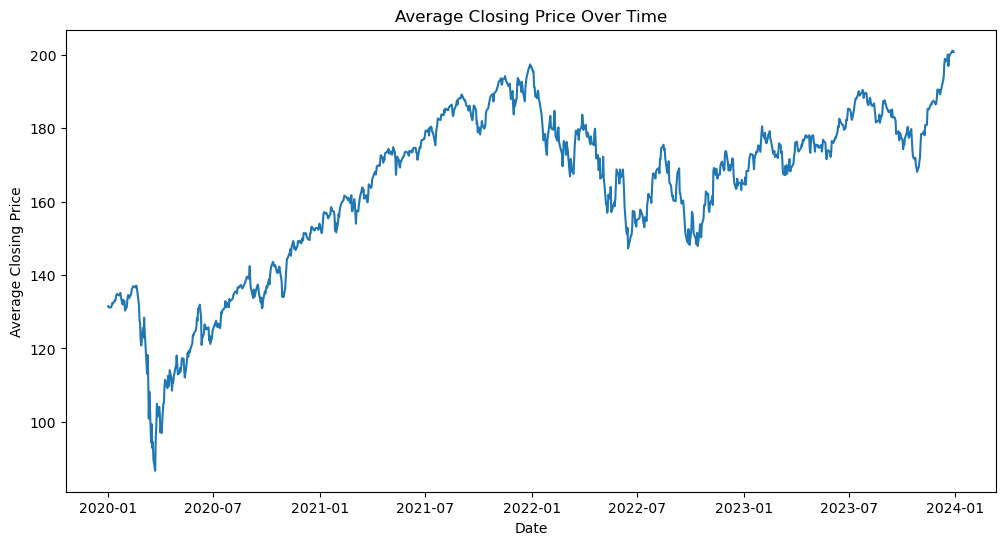

In [15]:
df_date = df.groupby('Date')['Close'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_date, x='Date', y='Close')
plt.title("Average Closing Price Over Time")
plt.xlabel("Date")
plt.ylabel("Average Closing Price")
plt.show()


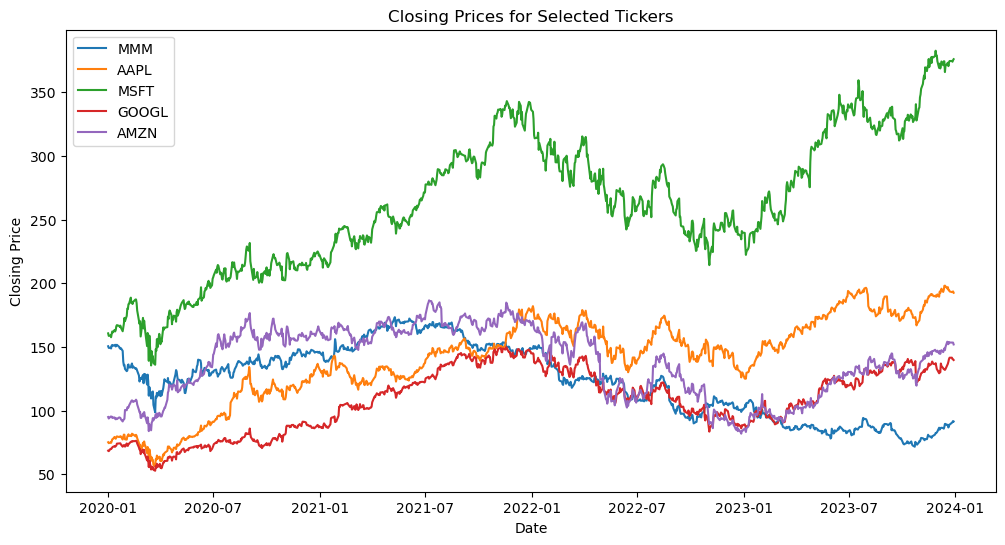

In [16]:
selected_tickers = ['MMM', 'AAPL', 'MSFT', 'GOOGL', 'AMZN']
df_subset = df[df['Ticker'].isin(selected_tickers)]

plt.figure(figsize=(12, 6))
for ticker in selected_tickers:
    subset = df_subset[df_subset['Ticker'] == ticker]
    plt.plot(subset['Date'], subset['Close'], label=ticker)

plt.title("Closing Prices for Selected Tickers")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.legend()
plt.show()


/var/folders/82/mmpmdh_15n73f096pfrl3yvh0000gn/T/ipykernel_52861/2322120277.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Ticker'] = subset['Ticker'].astype('category')  # Ensure ticker is treated as a categorical variable
/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.o

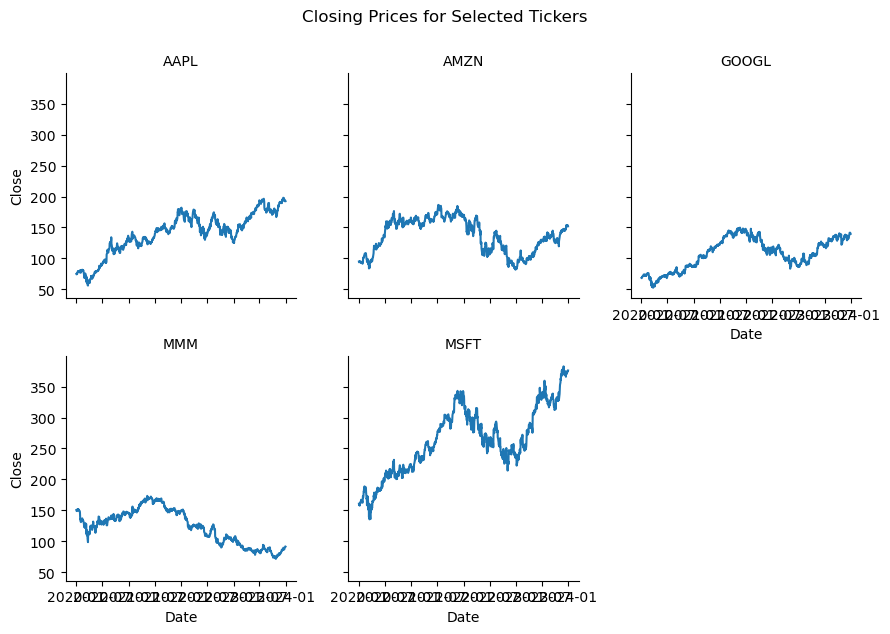

In [17]:
subset = df[df['Ticker'].isin(selected_tickers)]
subset['Ticker'] = subset['Ticker'].astype('category')  # Ensure ticker is treated as a categorical variable

g = sns.FacetGrid(subset, col="Ticker", col_wrap=3, height=3, sharex=True, sharey=True)
g.map(sns.lineplot, "Date", "Close")
g.set_titles("{col_name}")
g.fig.suptitle("Closing Prices for Selected Tickers", y=1.05)
plt.show()


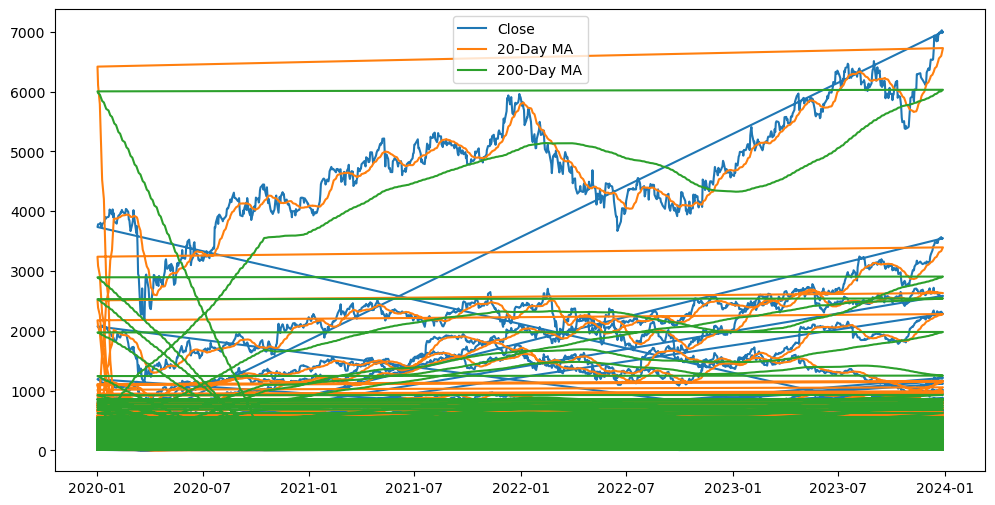

NameError: name 'seasonal_decompose' is not defined

In [19]:
df.set_index('Date', inplace=True)

df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA200'] = df['Close'].rolling(window=200).mean()

plt.figure(figsize=(12, 6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA20'], label='20-Day MA')
plt.plot(df['MA200'], label='200-Day MA')
plt.legend()
plt.show()

df['Daily Return'] = df['Close'].pct_change()

result = seasonal_decompose(df['Close'], model='multiplicative', period=252)
result.plot()
plt.show()

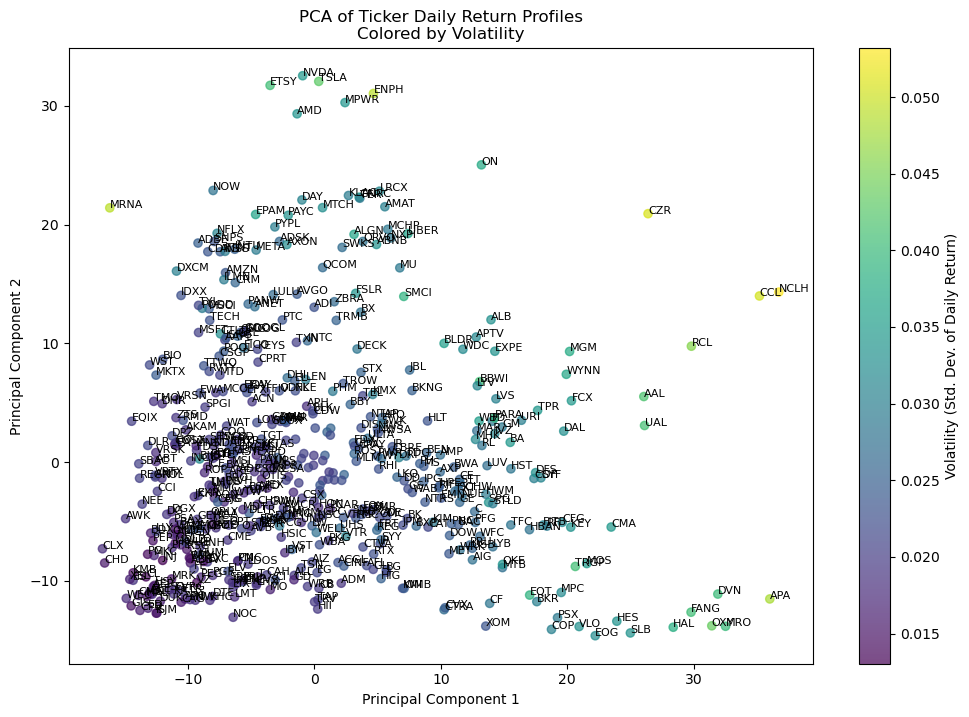

In [29]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

ticker_returns = df.pivot(index='Ticker', columns='Date', values='Daily Return')
ticker_returns = ticker_returns.fillna(0)  # Fill missing values (alternative approaches are possible)

scaler = StandardScaler()
ticker_returns_scaled = scaler.fit_transform(ticker_returns)

pca = PCA(n_components=2)
pca_components = pca.fit_transform(ticker_returns_scaled)

pca_df = pd.DataFrame(pca_components, index=ticker_returns.index, columns=['PC1', 'PC2'])

volatility = df.groupby('Ticker')['Daily Return'].std()
pca_df['Volatility'] = volatility

plt.figure(figsize=(12, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Volatility'], cmap='viridis', alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title("PCA of Ticker Daily Return Profiles\nColored by Volatility")
cbar = plt.colorbar(scatter)
cbar.set_label('Volatility (Std. Dev. of Daily Return)')

for ticker, row in pca_df.iterrows():
    if abs(row['PC1']) > 3 or abs(row['PC2']) > 3:
        plt.text(row['PC1'], row['PC2'], ticker, fontsize=8)
plt.show()


/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


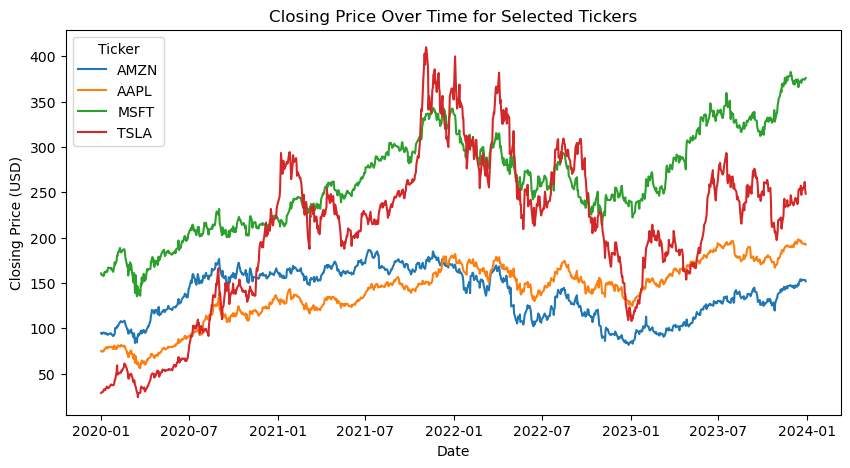

/var/folders/82/mmpmdh_15n73f096pfrl3yvh0000gn/T/ipykernel_52861/2070777182.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Daily Return"] = df_filtered.groupby("Ticker")["Close"].pct_change()
/var/folders/82/mmpmdh_15n73f096pfrl3yvh0000gn/T/ipykernel_52861/2070777182.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["Volatility"] = df_filtered.groupby("Ticker")["Daily Return"].rolling(window=20).std().reset_index(level=0, drop=True)


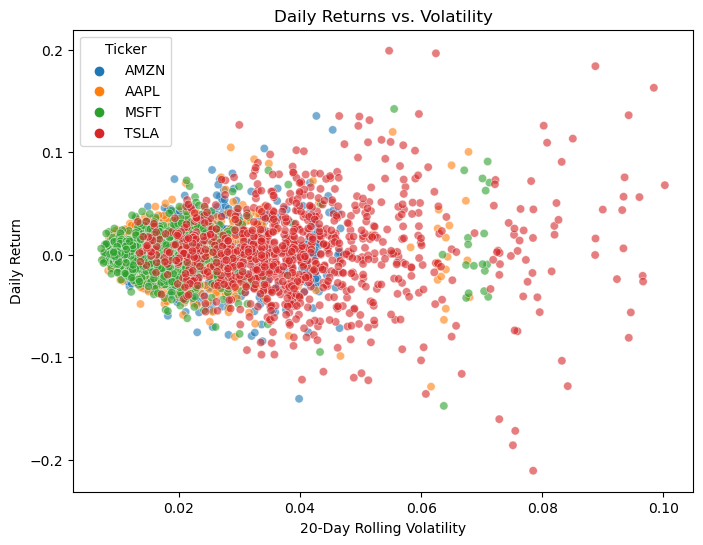

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


tickers = ["AAPL", "MSFT", "TSLA", "AMZN"]
df_filtered = df[df["Ticker"].isin(tickers)]

plt.figure(figsize=(10, 5))
sns.lineplot(data=df_filtered, x="Date", y="Close", hue="Ticker")
plt.title("Closing Price Over Time for Selected Tickers")
plt.xlabel("Date")
plt.ylabel("Closing Price (USD)")
plt.legend(title="Ticker")
plt.show()

df_filtered["Daily Return"] = df_filtered.groupby("Ticker")["Close"].pct_change()

df_filtered["Volatility"] = df_filtered.groupby("Ticker")["Daily Return"].rolling(window=20).std().reset_index(level=0, drop=True)

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_filtered, x="Volatility", y="Daily Return", hue="Ticker", alpha=0.6)
plt.title("Daily Returns vs. Volatility")
plt.xlabel("20-Day Rolling Volatility")
plt.ylabel("Daily Return")
plt.legend(title="Ticker")
plt.show()



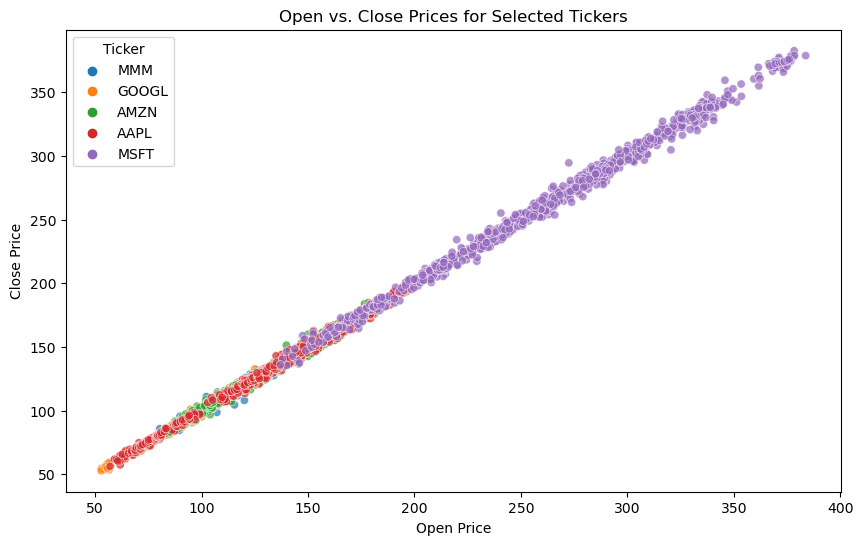

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

selected_tickers = ['MMM', 'AAPL', 'MSFT', 'GOOGL', 'AMZN']
df_subset = df[df['Ticker'].isin(selected_tickers)]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_subset, x="Open", y="Close", hue="Ticker", alpha=0.7)
plt.title("Open vs. Close Prices for Selected Tickers")
plt.xlabel("Open Price")
plt.ylabel("Close Price")
plt.legend(title="Ticker")
plt.show()


/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/surenbhakta/anaconda3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


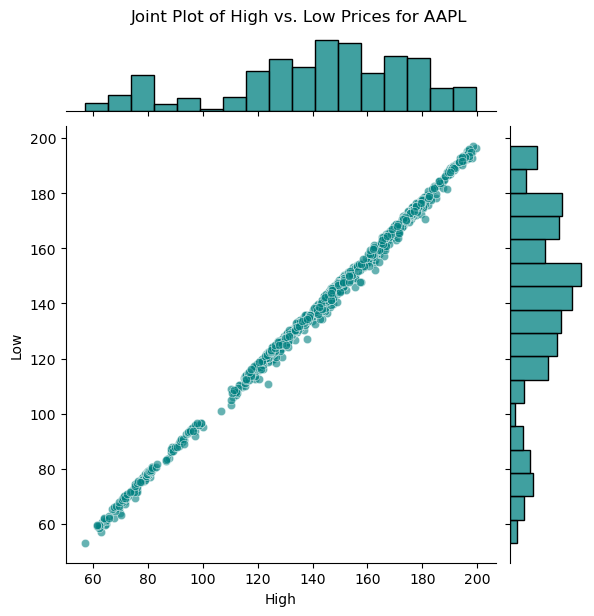

In [34]:
sample_ticker = 'AAPL'  # Change to any one ticker from the list if you want to inspect one in detail
df_sample = df_subset[df_subset['Ticker'] == sample_ticker]

sns.jointplot(x='High', y='Low', data=df_sample, kind="scatter", color="teal", alpha=0.6)
plt.suptitle(f"Joint Plot of High vs. Low Prices for {sample_ticker}", y=1.02)
plt.show()


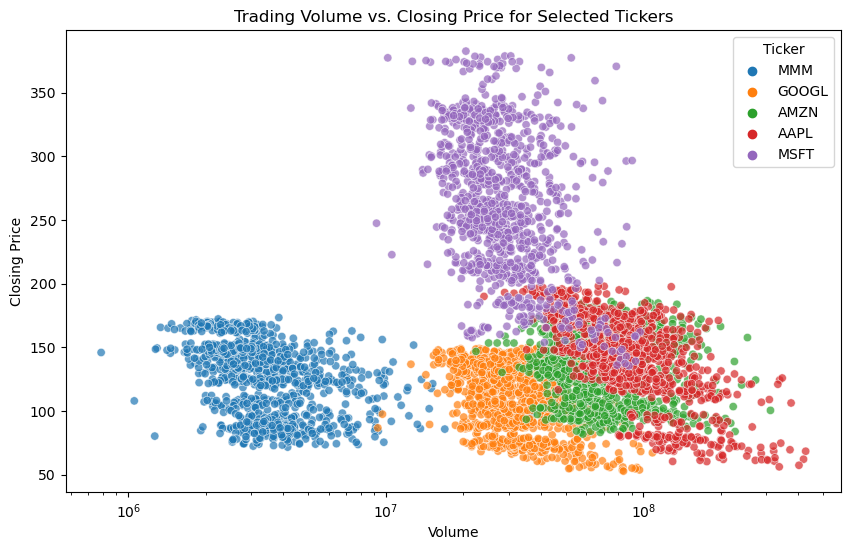

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_subset, x="Volume", y="Close", hue="Ticker", alpha=0.7)
plt.title("Trading Volume vs. Closing Price for Selected Tickers")
plt.xlabel("Volume")
plt.ylabel("Closing Price")
plt.xscale("log")  # Use logarithmic scale for volume
plt.legend(title="Ticker")
plt.show()


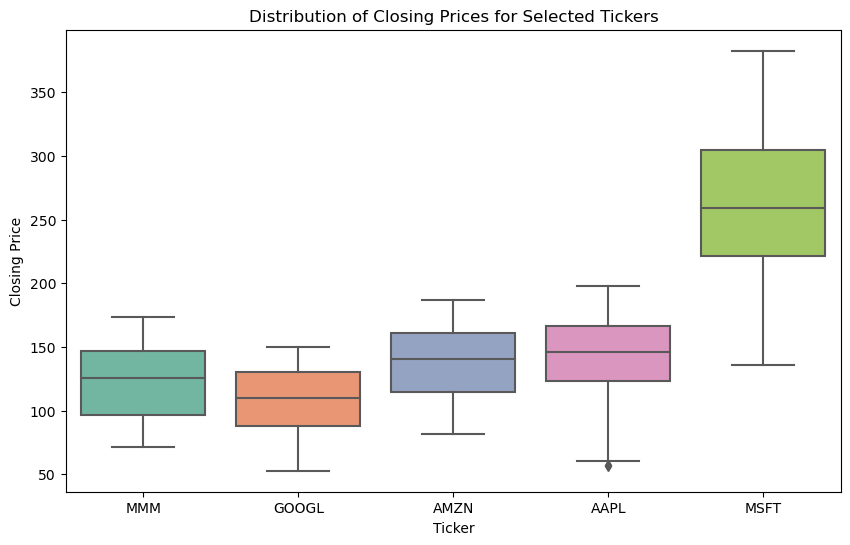

In [36]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Ticker', y='Close', data=df_subset, palette="Set2")
plt.title("Distribution of Closing Prices for Selected Tickers")
plt.xlabel("Ticker")
plt.ylabel("Closing Price")
plt.show()
